# Homework 1

J Steven Raquel
PSTAT 134
Fri 9AM Section

## Testing for distributions

For this assignment, I will simulate data from two different distributions and use hypothesis testing to determine whether the data actually conforms to the distribution they were sampled from. 

In [268]:
# importing the necessary modules
import numpy as np
import pandas as pd
import random as rd
# to simulate from a Bernoulli distribution
from scipy.stats import bernoulli,poisson,norm,expon
# for plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
from IPython.core.pylabtools import figsize

In [269]:
# a function that counts the times a coin comes up heads (1)
def coin_flip(size):
    heads = 0
    for x in range(size):
        flip = random.randint(0,1) # picking randomly between 0 and 1
        if flip == 1: 
            heads += 1
    return heads

A coin flip follows the Bernoulli distribution, which is itself a special case of the Binomial distribution. 

The following code simulates flipping coins a different number of times, recording how many times it comes up heads, and what percentage of the flips in each session were heads. 

In [251]:
# different sample sizes
n_choices = np.array([5, 10, 15, 20, 25, 50, 100, 200])

# simulating different numbers of coin flips and storing it in an array
sims = []
for n in n_choices:
    sims += [coin_flip(n)]

In [252]:
# creating a data.frame of the number of throws and the percentage of heads
df = pd.DataFrame({
    'n_flips': n_choices,
    'n_heads': sims,
    'pct_heads' : sims / n_choices,
})
df

,n_flips,n_heads,pct_heads
0,5,4,0.800000
1,10,4,0.400000
2,15,5,0.333333
3,20,12,0.600000
4,25,14,0.560000
5,50,28,0.560000
6,100,57,0.570000
7,200,103,0.515000


As we can see in the table and the following graph, it's quite clear that as you increase the sample size, the sample mean will gradually approach the theoretical mean. Since we know that our coin in this case is fair, it should come as no surprise that although initial flips were far from the theoretical mean (0.5) the increase in sample size decreased the variance more and more. 

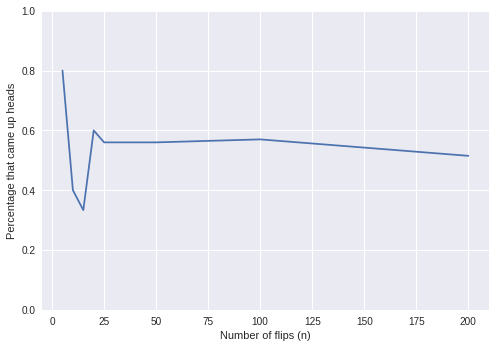

In [285]:
# plotting number of flips vs percentage that came up heads
axes = plt.gca()
axes.set_ylim([0,1])

figsize(11, 9)
plt.plot(df['n_flips'], df['pct_heads']);
plt.xlabel("Number of flips (n)");
plt.ylabel("Percentage that came up heads");

## Hypothesis Testing

Let $p$ equal the probability that a certain coin comes up heads. 

Suppose we have the null and alternative hypotheses 

$H_0: \text{The coin is fair } (p = 0.5)$

$H_1: \text{The coin is not fair } (p \neq 0.5)$

Suppose we have flipped a coin 100 times and 57% of the time is has come up heads, as you can see in the simulation above. 

We can use a two-sided Z-test to test whether or not the coin is truly fair. 

This consists of calculating a test statistic $z$, which 'standardizes' our sample mean to the standard Normal distribution. This employs the Normal approximation to the Binomial distribution.

The statistic quantifies how far away our sample mean $\hat{p}$ is from the true population mean $p$ (0.5). We then compare the statistic to a critical value determined by the confidence level $\alpha$. If the absolute value of our test-statistic (because it's a two-sided test) exceeds this critical value, then we reject the null hypothesis $H_0$.

Our test statistic $z$ is calculated via the formula

$$z = \frac{\hat{p} - p}{\sqrt{\frac{pq}{N}}}$$

where $q = 1-p$ and $N$ is the sample size, 200.

At a confidence level of $\alpha = 0.05$, we would _reject_ the null hypothesis $H_0$ if $|z| > 1.96$.

Our $\hat{p} = 0.57$, $p = 0.5$, and $q = 0.5$. Therefore our Z-statistic is

In [279]:
z = (0.57-0.5)/sqrt((0.5*0.5)/100)
z

1.399999999999999

A Z-statistic of 1.399 means that our sample $\hat{p}$ is 1.399 standard deviations from the theoretical mean, 0.5. Since 1.399 is smaller than 1.96, we would fail to reject the null hypothesis in this case and conclude that the coin is fair. 

A Z-statistic greater than 1.96 would result in us rejecting the null hypothesis, because the probability of getting such a value and the null hypothesis still being true is too low for us to consider it. This is about avoiding a **type I error**. 

### Type I and Type II errors

The confidence level $\alpha$ is also the probability of incurring a **Type I error**, which is to reject a true null hypothesis, otherwise known as a _false positive_. Conversely, a **Type II error** is to fail to reject a false null hypothesis, or a _false negative_. The probability of a Type II error is represented by $\beta$. The probability of _not_ incurring a Type 2 error in a hypothesis test is called the 'power' of a test. 

When we set the confidence level, we are essentially designating a threshold. For a two-sided Z-test at a confidence level of 0.05, we are saying that if our sample is more than 1.96 standard deviations away from the theoretical mean, it is more than 5% likely to be a Type I error. This probability is known as the **p-value**. In this example, a test-statistic greater than 1.96 would have a p-value greater than 0.05. 

### Power of a test

The **power** of a hypothesis test is determined by a number of factors, namely the confidence level and the sample size. The larger the sample size, the greater the power of the test. We can also set a higher confidence level. But again, that also means increasing our chances at a Type I error--thus the trade-off between incurring a false negative and a false positive is illustrated. 